IMPORTING THE DEPENDENCIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

DATA COLLECTION AND PROCESSING

In [2]:
#load the data from csv file to pandas dataframe
titanic_data=pd.read_csv("tested.csv")

In [3]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [6]:
#to check the number of rows and columns
titanic_data.shape

(418, 12)

In [7]:
# getting the information about the data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
#check the number of missing values in each coloumn
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

HANDLING THE MISSING VALUES

In [9]:
#drop the "Cabin" colomn from the dataframe
titanic_data=titanic_data.drop(columns="Cabin",axis=1)

In [10]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [11]:
#Replacing the missing values in"Age" coloumn with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [12]:
# Finding the mode value(most repated value in Fare) of 'Fare' column
print(titanic_data['Fare'].mode()[0])

7.75


In [13]:
#Replacing the missing 
titanic_data['Fare'].fillna(titanic_data['Fare'].mode()[0],inplace=True)

In [14]:
#checking the null values after replacing
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

DATA ANALYSIS

In [15]:
# getting some statistical measures about the titanic data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [16]:
# finding the no of people who survived and not survived
titanic_data['Survived'].value_counts() # 0-not survived, 1-survived

0    266
1    152
Name: Survived, dtype: int64

DATA VISUALIZATION

In [17]:
sns.set()

<AxesSubplot: xlabel='Survived', ylabel='count'>

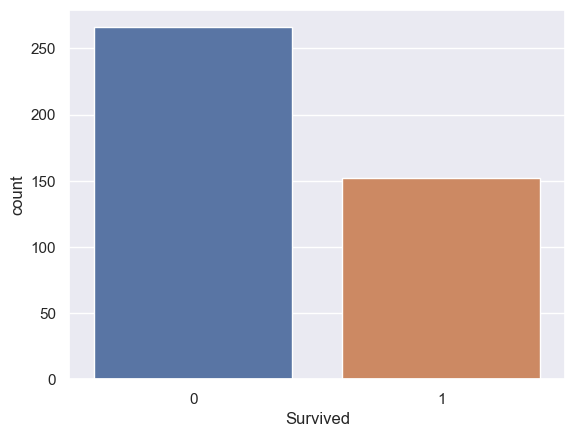

In [19]:
# making a count plot for "Survived" column
# count plot can be made by using seaborn Library and function that we use is sns.countplot
sns.countplot(x='Survived',data=titanic_data)

In [20]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='count'>

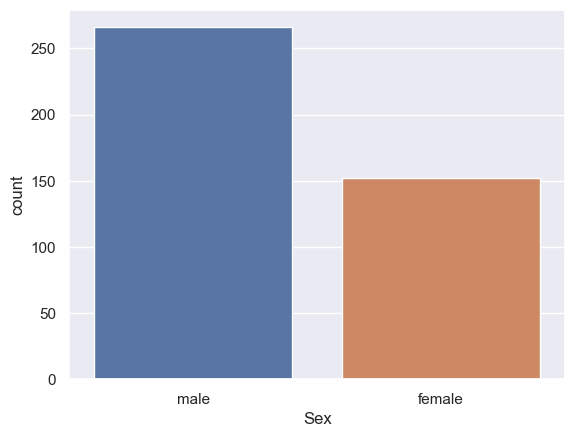

In [22]:
# making a count plot for "Sex" column
sns.countplot(x='Sex',data=titanic_data)

<AxesSubplot: xlabel='Sex', ylabel='count'>

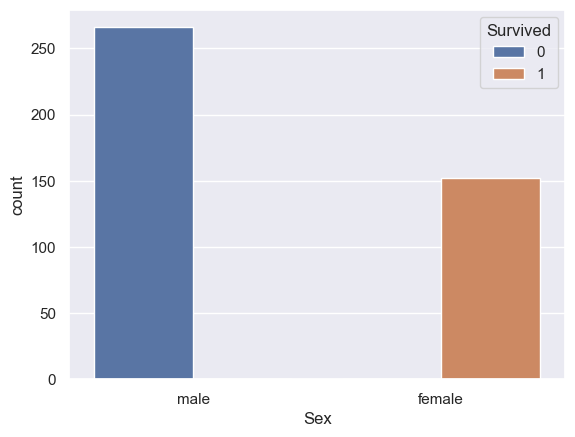

In [23]:
# no of survivors based on gender
sns.countplot(x='Sex',hue='Survived',data=titanic_data)

<AxesSubplot: xlabel='count', ylabel='Pclass'>

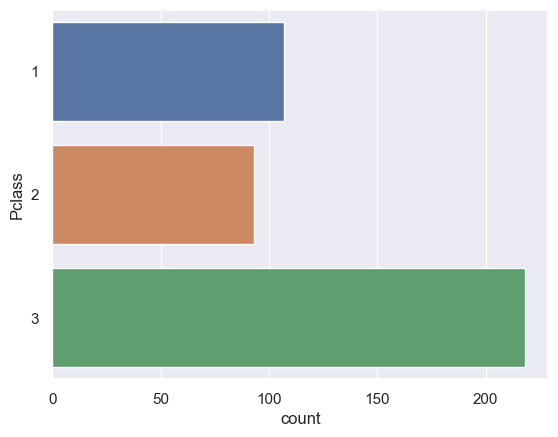

In [25]:
sns.countplot(y='Pclass',data=titanic_data)

<AxesSubplot: xlabel='count', ylabel='Pclass'>

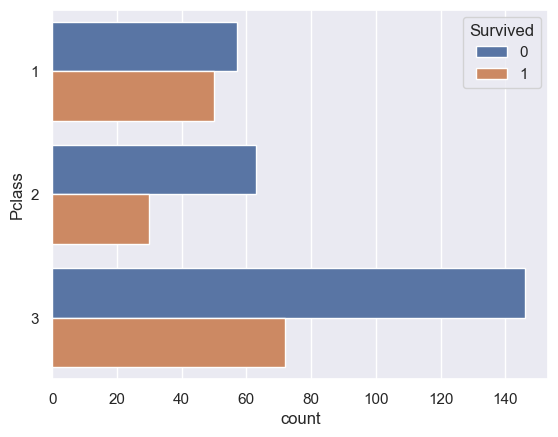

In [26]:
sns.countplot(y='Pclass',hue='Survived',data=titanic_data)

ENCODING THE CATEGORICAL COLUMNS

In [27]:
titanic_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [28]:
titanic_data['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [29]:
# Converting the categorical columns i.e we are replacing the colmn sex column gender-male as 0 & female as 1
# and Embarked colmn S as 0, C as 1,Q as 2.. we are doing this so that our machine understands numerical value rather than texts

titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [30]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


SEPERATING FEATURES AND TARGET

In [31]:
X = titanic_data.drop(columns=['Name','Ticket','PassengerId','Survived'],axis=0)
Y = titanic_data['Survived']

In [32]:
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    0  34.50000      0      0    7.8292         2
1         3    1  47.00000      1      0    7.0000         0
2         2    0  62.00000      0      0    9.6875         2
3         3    0  27.00000      0      0    8.6625         0
4         3    1  22.00000      1      1   12.2875         0
..      ...  ...       ...    ...    ...       ...       ...
413       3    0  30.27259      0      0    8.0500         0
414       1    1  39.00000      0      0  108.9000         1
415       3    0  38.50000      0      0    7.2500         0
416       3    0  30.27259      0      0    8.0500         0
417       3    0  30.27259      1      1   22.3583         1

[418 rows x 7 columns]


In [33]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


SPLITTING THE DATA INTO TRAIN DATA AND TEST DATA

In [35]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.25,random_state=32)

In [36]:
print(X.shape,X_train.shape,X_test.shape)

(418, 7) (313, 7) (105, 7)


MODEL TRAINING

LOGISTIC REGRESSION

In [37]:
model = LogisticRegression()

In [38]:
# traing data is X_train & Y_train
# training the Logistic Regression Model with training data
model.fit(X_train,Y_train)

LogisticRegression()

MODEL EVALUATION

ACCURACY SCORE

In [39]:
# this will give the accuracy of the training data
X_train_prediction = model.predict(X_train)

In [40]:
print(X_train_prediction)

[0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0]


In [41]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data:',training_data_accuracy)

Accuracy score of training data: 1.0


EVALUATE THE MODEL WITH TEST DATA

In [42]:
X_test_prediction=model.predict(X_test)

In [43]:
print(X_test_prediction)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 1]


In [44]:
testing_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of testing data:',testing_data_accuracy)

Accuracy score of testing data: 1.0


In [45]:
from sklearn.svm import SVC

support = SVC()

In [53]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

In [54]:
tree.fit(X_train,Y_train)

DecisionTreeRegressor()

In [46]:
support.fit(X_train,Y_train)

SVC()

In [56]:
X_train_prediction2 = tree.predict(X_train)

In [57]:
# this will give the accuracy of the training data
X_train_prediction1 = support.predict(X_train)



In [58]:
print(X_train_prediction2)

[0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0.]


In [59]:
print(X_train_prediction1)

[0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]


In [60]:
training_data_accuracy1=accuracy_score(Y_train,X_train_prediction1)
print('Accuracy score of training data:',training_data_accuracy1)

Accuracy score of training data: 0.6421725239616614


In [61]:
X_test_prediction1=support.predict(X_test)
print(X_test_prediction1)

[1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]


In [62]:
testing_data_accuracy1=accuracy_score(Y_test,X_test_prediction1)
print('Accuracy score of testing data:',testing_data_accuracy1)

Accuracy score of testing data: 0.6666666666666666


In [63]:
#Decision Tree Regressor

#obtaining the accuracy for both the Testing and Training data by using the decision Tree.

training_data_accuracy2=accuracy_score(Y_train,X_train_prediction2)
print('Accuracy score of training data:',training_data_accuracy2)


X_test_prediction2=support.predict(X_test)
print(X_test_prediction2)


testing_data_accuracy2=accuracy_score(Y_test,X_test_prediction2)
print('Accuracy score of testing data:',testing_data_accuracy2)


Accuracy score of training data: 1.0
[1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
Accuracy score of testing data: 0.6666666666666666


## Prediction System

In [64]:
import pickle
pickle.dump(tree,open("titanic-survival.pkl","wb"))

In [65]:
with open('titanic-survival.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [66]:
loaded_model = pickle.load(open("titanic-survival.pkl", "rb"))
loaded_model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 1., 1.])

In [68]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [69]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
58,3,0,30.27259,1,0,16.1000,0
391,1,1,51.00000,0,1,39.4000,0
209,3,0,25.00000,0,0,7.8958,0
94,1,0,25.00000,0,0,26.0000,1
240,1,1,55.00000,0,0,27.7208,1


In [71]:
import pandas as pd

# Create a DataFrame with the new data in the same format as the training data
New_data = pd.DataFrame([[3,0,30.11,0,1,18.21,1]], columns=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])

In [73]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


In [72]:
# Make predictions using the loaded model
survival_prediction = loaded_model.predict(New_data)

print("Passenger Survival in Titanic is :",survival_prediction[0])

#0-not survived, 1-survived

Passenger Survival in Titanic is : 0.0


In [74]:
New_data1 = pd.DataFrame([[3,1,47.0,1,0,7.00,0]], columns=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])

In [75]:
# Make predictions using the loaded model
survival_prediction1 = loaded_model.predict(New_data1)

print("Passenger Survival in Titanic is :",survival_prediction1[0])

#0-not survived, 1-survived

Passenger Survival in Titanic is : 1.0


In [81]:
Final_Data = pd.DataFrame([[3,1,35,1,0,9.00,1]], columns=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])

In [82]:
# Make predictions using the loaded model
survival_prediction2 = loaded_model.predict(Final_Data)

print("Passenger Survival in Titanic is :",survival_prediction2[0])

#0-not survived, 1-survived

Passenger Survival in Titanic is : 1.0
